In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
class DataProcessor:
    def __init__(self, file=None):
        self.file = file

    def load_data(self, filepath):
        data = pd.read_csv(filepath)
        return data
    
    def clean_data(self, data):
        clean_data = data.dropna()
        return clean_data

In [3]:
data_processor = DataProcessor()
filepath = 'data/train.csv'
data = data_processor.load_data(filepath)
cleaned_data = data_processor.clean_data(data)

In [4]:
class DataAnalyzer:
    def get_average_of_column(self, data, column_name):
        avg_mean = data[column_name].mean()
        return avg_mean
    
    def get_distribution_of_column(self, data, column_name):
        distribution = data[column_name].value_counts()
        return distribution
    
    def get_median_of_column(self, data, column_name):
        median = data[column_name].median()
        return median
    
    def get_mode_of_column(self, data, column_name):
        mode_av = stats.mode(data[column_name], axis=None, keepdims=True)
        return mode_av

In [5]:
analyzer = DataAnalyzer()

In [6]:
average = analyzer.get_average_of_column(cleaned_data, "Age")
print("Average:", average)

Average: 35.6744262295082


In [7]:
distribution = analyzer.get_distribution_of_column(cleaned_data, "Fare")
print("Distribution:\n", distribution)

Distribution:
 Fare
26.5500     7
53.1000     5
90.0000     4
10.5000     4
13.0000     4
           ..
211.5000    1
8.0500      1
81.8583     1
27.7500     1
5.0000      1
Name: count, Length: 93, dtype: int64


In [8]:
median = analyzer.get_median_of_column(cleaned_data, "Fare")
print("Median:", median)

Median: 57.0


In [9]:
mode_av = analyzer.get_mode_of_column(cleaned_data, "PassengerId")
print("Mode:", mode_av)

Mode: ModeResult(mode=array([2], dtype=int64), count=array([1]))


In [10]:
class DataVisualizer:
    def __init__(self, data):
        self.data = data
    
    def plot_line_chart(self, x="Pclass", y="Age"):
        sns.lineplot(x=x, y=y, data=self.data)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title('Line Chart')
        plt.savefig("output/line_chart.png")
        plt.show()

    def plot_distribution_chart(self, column_name, kde=False):
        sns.histplot(data=self.data[self.data[column_name] != 80], x=column_name, kde=kde)
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.title('Distribution')
        plt.savefig("output/distribution_chart.png")
        plt.show()

    def plot_pie(self, column_name):
        counts = self.data[column_name].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
        plt.title('Pie Chart')
        plt.savefig("output/pie_chart.png")
        plt.show()
    
    def plot_scatter(self, column_name, hue=None):
        sns.scatterplot(data=self.data, x=self.data.index, y=column_name, hue=hue)
        plt.xlabel('Index')
        plt.ylabel(column_name)
        plt.title('Scatter Plot')
        plt.savefig("output/scatter_plot.png")
        plt.show()

In [11]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

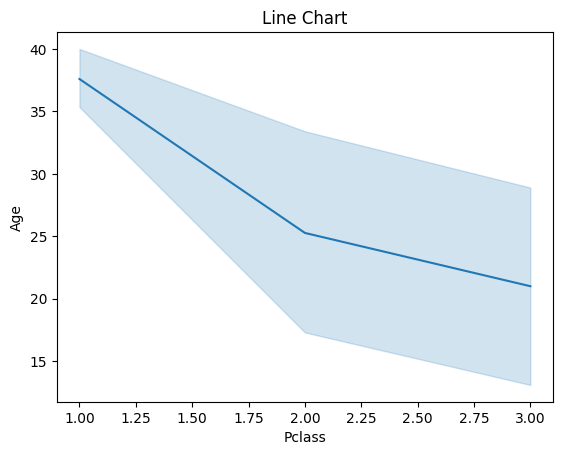

In [12]:
visualizer = DataVisualizer(cleaned_data)
visualizer.plot_line_chart()

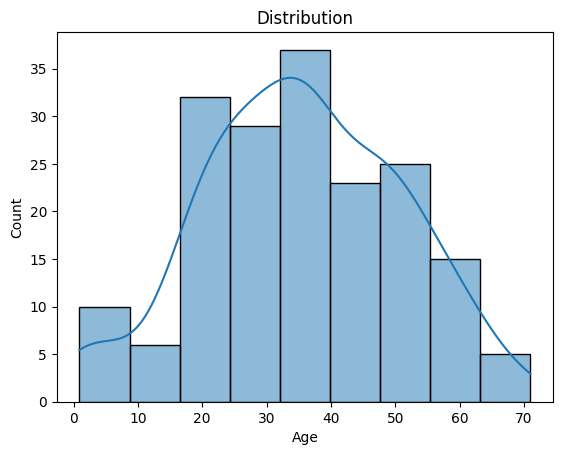

In [13]:
visualizer.plot_distribution_chart("Age", kde=True)

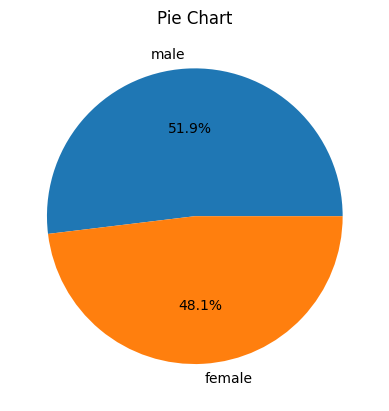

In [14]:
visualizer.plot_pie("Sex")

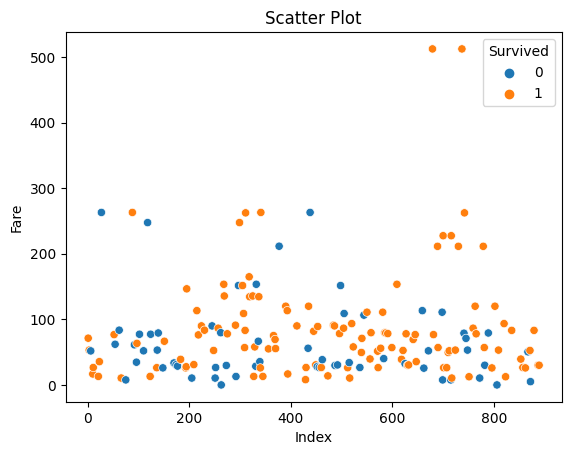

In [15]:
visualizer.plot_scatter("Fare", hue="Survived")